In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
def cross_validate_learning_rate(estimator, x_train, y_train, cv = 5, scoring = 'roc_auc', return_train_score = True):
    results = cross_validate(estimator,
                            x_train,
                            y_train,
                            cv = cv,
                            scoring=scoring,
                            return_train_score = return_train_score ) 
    train_scores = results['train_score']
    test_scores = results['test_score']
    print("train_scores: {}".format(np.mean(train_scores)))
    print("test_scores: {}".format(np.mean(test_scores)))

    lc = learning_curve(estimator, 
                        x_train, 
                        y_train, 
                        cv=cv, 
                        scoring=scoring)
    samples, train, test = lc[0],lc[1],lc[2]
    plt.plot(samples, np.mean(train, axis=1))
    plt.plot(samples, np.mean(test, axis=1))

In [3]:
from sklearn.model_selection import GridSearchCV
def grid_search_param(X, y,nfolds, param_grid, model_sklearn, scoring = 'roc_auc'):
    grid_search = GridSearchCV(model_sklearn, param_grid, cv=nfolds, return_train_score=True, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search

In [4]:
path = '../data'
y_train = pd.read_csv(f'{path}/y_train.csv', index_col = 'key_value')

In [5]:
list_train_probs = []
list_train_probs.append(pd.read_pickle('train_probs_catboost.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_lightgbm.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_xgb.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_lightgbm_cf.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_rnn.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_randomforrest.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_etc.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_gbc.pkl'))
train = pd.concat(list_train_probs, axis=1)
train.columns = ['probs_catboost','probs_lightgbm','probs_xgb','probs_lightgbm_cf','probs_rnn','probs_randomforrest','probs_etc','probs_gbc']
train

,probs_catboost,probs_lightgbm,probs_xgb,probs_lightgbm_cf,probs_rnn,probs_randomforrest,probs_etc,probs_gbc
key_value,,,,,,,,
0,0.075559,0.083673,0.075589,0.058853,0.135238,0.058,0.082,0.085178
1,0.161749,0.133572,0.162079,0.120991,0.114260,0.232,0.182,0.097961
2,0.039483,0.039735,0.032988,0.032979,0.028066,0.144,0.192,0.053191
3,0.014844,0.008416,0.011796,0.008240,0.016595,0.012,0.026,0.051459
4,0.988394,0.923350,0.975676,0.960733,0.959057,0.752,0.730,0.899184
...,...,...,...,...,...,...,...,...
358482,0.057822,0.049744,0.061179,0.028396,0.059793,0.090,0.042,0.073628
358483,0.080988,0.069483,0.074895,0.075432,0.080740,0.118,0.134,0.105396
358484,0.323118,0.318980,0.275796,0.279125,0.296452,0.278,0.298,0.301960


In [6]:
list_test_probs = []
list_test_probs.append(pd.read_pickle('test_probs_catboost.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_lightgbm.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_xgb.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_lightgbm_cf.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_rnn.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_randomforrest.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_etc.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_gbc.pkl'))
test = pd.concat(list_test_probs, axis=1)
test.columns = ['probs_catboost','probs_lightgbm','probs_xgb','probs_lightgbm_cf','probs_rnn','probs_randomforrest','probs_etc','probs_gbc']
test

,probs_catboost,probs_lightgbm,probs_xgb,probs_lightgbm_cf,probs_rnn,probs_randomforrest,probs_etc,probs_gbc
key_value,,,,,,,,
0,0.003800,0.003408,0.004199,0.004778,0.013468,0.0120,0.0340,0.048587
1,0.173367,0.099485,0.064322,0.109926,0.202972,0.1820,0.1324,0.169610
2,0.034206,0.023485,0.037000,0.026376,0.065726,0.0464,0.0480,0.084776
3,0.439349,0.389429,0.420873,0.468930,0.638483,0.5824,0.4944,0.660345
4,0.212322,0.152717,0.179810,0.173116,0.233716,0.2032,0.2256,0.203538
...,...,...,...,...,...,...,...,...
396661,0.067477,0.095350,0.108038,0.050244,0.072599,0.1012,0.1044,0.081828
396662,0.160853,0.188772,0.155656,0.229417,0.130131,0.0700,0.0676,0.092795
396663,0.291086,0.252339,0.245086,0.266309,0.106833,0.2736,0.2344,0.209424


In [7]:
keep_columns = ['probs_catboost','probs_lightgbm','probs_lightgbm_cf','probs_randomforrest','probs_gbc']
train = train[keep_columns]
test = test[keep_columns]
train.shape, test.shape

((358487, 5), (396666, 5))

In [8]:
train.corr()

,probs_catboost,probs_lightgbm,probs_lightgbm_cf,probs_randomforrest,probs_gbc
probs_catboost,1.000000,0.973906,0.965638,0.911444,0.942786
probs_lightgbm,0.973906,1.000000,0.979459,0.916219,0.943864
probs_lightgbm_cf,0.965638,0.979459,1.000000,0.910831,0.939844
probs_randomforrest,0.911444,0.916219,0.910831,1.000000,0.922542
probs_gbc,0.942786,0.943864,0.939844,0.922542,1.000000


In [9]:
test.corr()

,probs_catboost,probs_lightgbm,probs_lightgbm_cf,probs_randomforrest,probs_gbc
probs_catboost,1.000000,0.988964,0.982547,0.934774,0.963257
probs_lightgbm,0.988964,1.000000,0.989069,0.934138,0.959969
probs_lightgbm_cf,0.982547,0.989069,1.000000,0.929915,0.956595
probs_randomforrest,0.934774,0.934138,0.929915,1.000000,0.940482
probs_gbc,0.963257,0.959969,0.956595,0.940482,1.000000


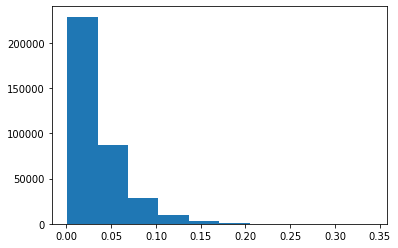

In [10]:
plt.hist(np.std(train.values, axis=1));

### Entrenando el modelo final

In [11]:
from sklearn.linear_model import LogisticRegression
### definir los parametros a tunear
Cs = [0.1, 0.3, 0.8, 0.9, 1.0]
# https://neurtu.readthedocs.io/examples/logistic_regression_scaling.html
solvers = ['lbfgs','saga','newton-cg'] # newton-cg, sag, lbfgs, liblinear, saga
param_grid = {'C': Cs,'solver':solvers}
### encontrando los hiper_parámetros
fitting=grid_search_param(train, y_train.target, 5,param_grid, LogisticRegression(penalty="l2", tol=0.0001, random_state=42), scoring='roc_auc')
### instanciar el estimador
estimator = fitting.best_estimator_
print(estimator)
### aplicar cross_validate y learning_rate 
# cross_validate_learning_rate(estimator, train, y_train, scoring='roc_auc')

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


train_scores: 0.8512890889739257
test_scores: 0.8512556804995637


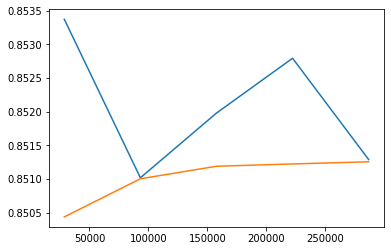

In [12]:
cross_validate_learning_rate(estimator, train, y_train.target, scoring='roc_auc')

In [13]:
estimator = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
estimator.fit(train, y_train.target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
test_stacking = pd.Series(estimator.predict_proba(test)[:,-1], index=test.index, name = 'target')
test_stacking

key_value
0         0.042621
1         0.091778
2         0.049040
3         0.404801
4         0.123826
            ...   
396661    0.071131
396662    0.138904
396663    0.222127
396664    0.053534
396665    0.043981
Name: target, Length: 396666, dtype: float64

In [15]:
test_stacking.to_csv("../results/stacking_6models_0.85125_all_training.csv") ### score de 0.84756 en la tabla publica